# Метрики

**CLIP-I** - среднее попарное косинусное сходство между сгенерированными и настоящими картинкой в латентном пространстве эмбеддингов модели CLIP

**CLIP-T** - среднее косинусное сходство между сгенерированными картинками и базовым промптом в пространстве модели CLIP

**G-R** - среднее косинусное сходство между сгенерированными картинками и контекстными промптами в пространстве модели CLIP

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid", palette=sns.color_palette("Set2"))

In [16]:
# Load the example diamonds dataset
data = pd.read_excel('metrics_qkv.xlsx')
data["Rank"] = data["Rank"].fillna("")

def label_point(x, y, rank, ax):
    a = pd.concat({'x': x, 'y': y, 'rank': rank}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], f"{str(point['rank'])}")

data['Method-Rank'] = data["Method"] + " " + data["Rank"].astype(str)
data['CLIP-I'] = data['CLIP-I'].astype(float)
data['CLIP-T'] = data['CLIP-T'].astype(float)
data['G-R'] = data['G-R'].astype(float)
data.head()

,Method,Concept,CLIP-I,CLIP-T,G-R,Rank,Method-Rank
0,Dreambooth,dog,0.933639,0.261725,0.850074,,Dreambooth
1,Dreambooth,backpack,0.868560,0.238333,0.860208,,Dreambooth
2,Dreambooth,cat,0.939915,0.232205,0.908645,,Dreambooth
3,QKV raw,dog,0.916939,0.273034,0.916939,,QKV raw
4,QKV raw,backpack,0.891628,0.244188,0.831253,,QKV raw


## Все концепты

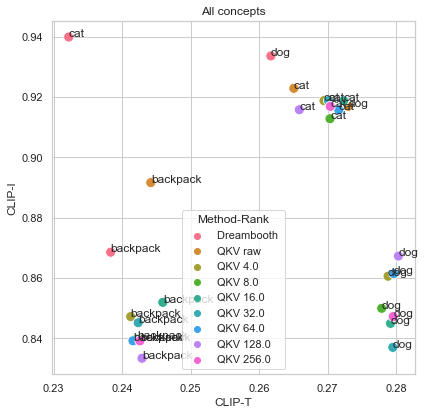

In [17]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="CLIP-T", y="CLIP-I",
                hue="Method-Rank",
                data=data, ax=ax,
                s=100).set(title='All concepts')

label_point(data["CLIP-T"], data["CLIP-I"], data["Concept"], plt.gca())

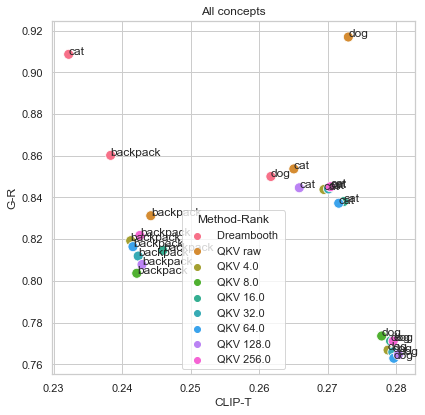

In [18]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="CLIP-T", y="G-R",
                hue="Method-Rank",
                data=data, ax=ax,
                s=100).set(title='All concepts')

label_point(data["CLIP-T"], data["G-R"], data["Concept"], plt.gca())

## Отдельно по концептам

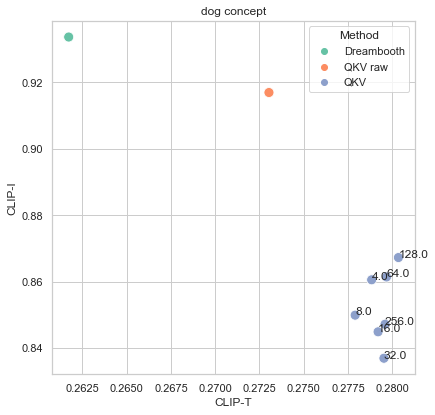

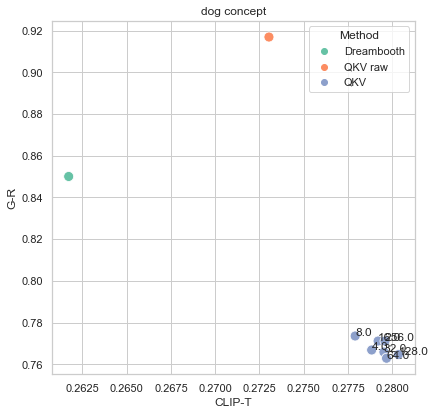

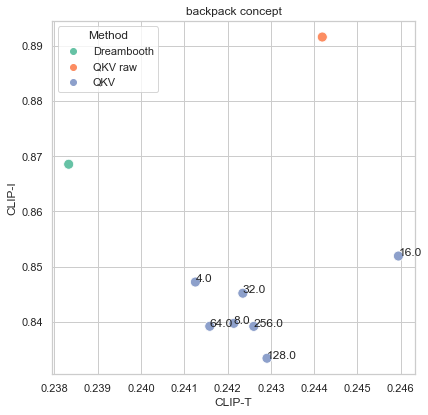

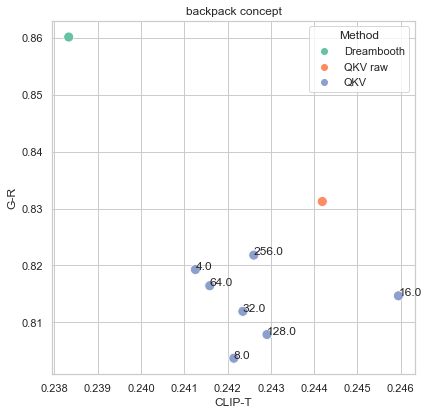

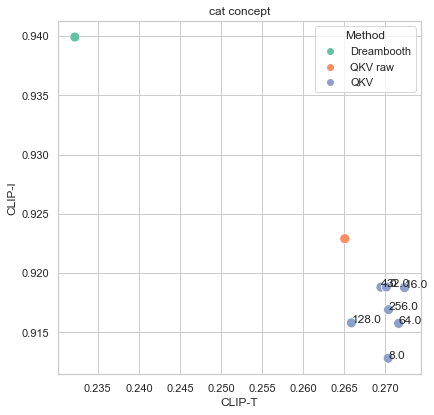

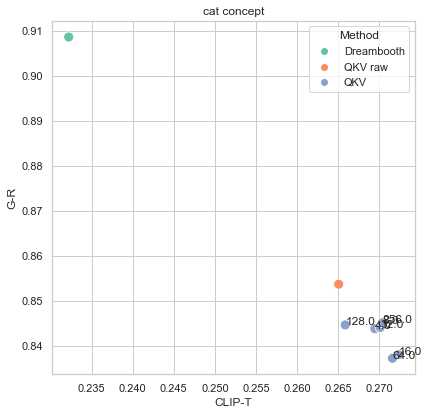

In [19]:
for concept in data["Concept"].unique():
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    
    concept_data = data[data["Concept"] == concept]
    sns.scatterplot(x="CLIP-T", y="CLIP-I",
                data=concept_data, ax=ax,
                hue="Method",
                s=100).set(title=f'{concept} concept')
    label_point(concept_data["CLIP-T"], concept_data["CLIP-I"], concept_data["Rank"], plt.gca())

    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.scatterplot(x="CLIP-T", y="G-R",
                data=concept_data, ax=ax,
                hue="Method",
                s=100).set(title=f'{concept} concept')
    label_point(concept_data["CLIP-T"], concept_data["G-R"], concept_data["Rank"], plt.gca())


# Примеры сгенерированных изображений

In [6]:
from glob import glob
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.axes_grid1 import ImageGrid

def get_examples(prompts_path):
    images_with_prompts = []
    last_prompt = ''
    for prompts_file in glob(prompts_path + '/*.txt'):
        filename, ext = os.path.basename(prompts_file).split('.')
        prompt = filename.split('_')[0]
        if prompt == last_prompt:
            continue

        n_gen_images = len(glob(f'{prompts_path}/{prompt}*.png'))
        id_image = random.randint(0, n_gen_images - 1)

        img = Image.open(f'{prompts_path}/{prompt}_{id_image}.png')
        
        images_with_prompts.append((prompt, img))
        
        last_prompt = prompt
    return images_with_prompts
    
def draw_examples(images_with_prompts):
    fig = plt.figure(figsize=(25., 25.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(5, 5),
                     axes_pad=1
                     )

    for ax, im in zip(grid, images_with_prompts):
        ax.imshow(im[1])
        ax.set_title(im[0])
        ax.grid(False)

    plt.show()

### QKV

Concept: dog6

Rank 4


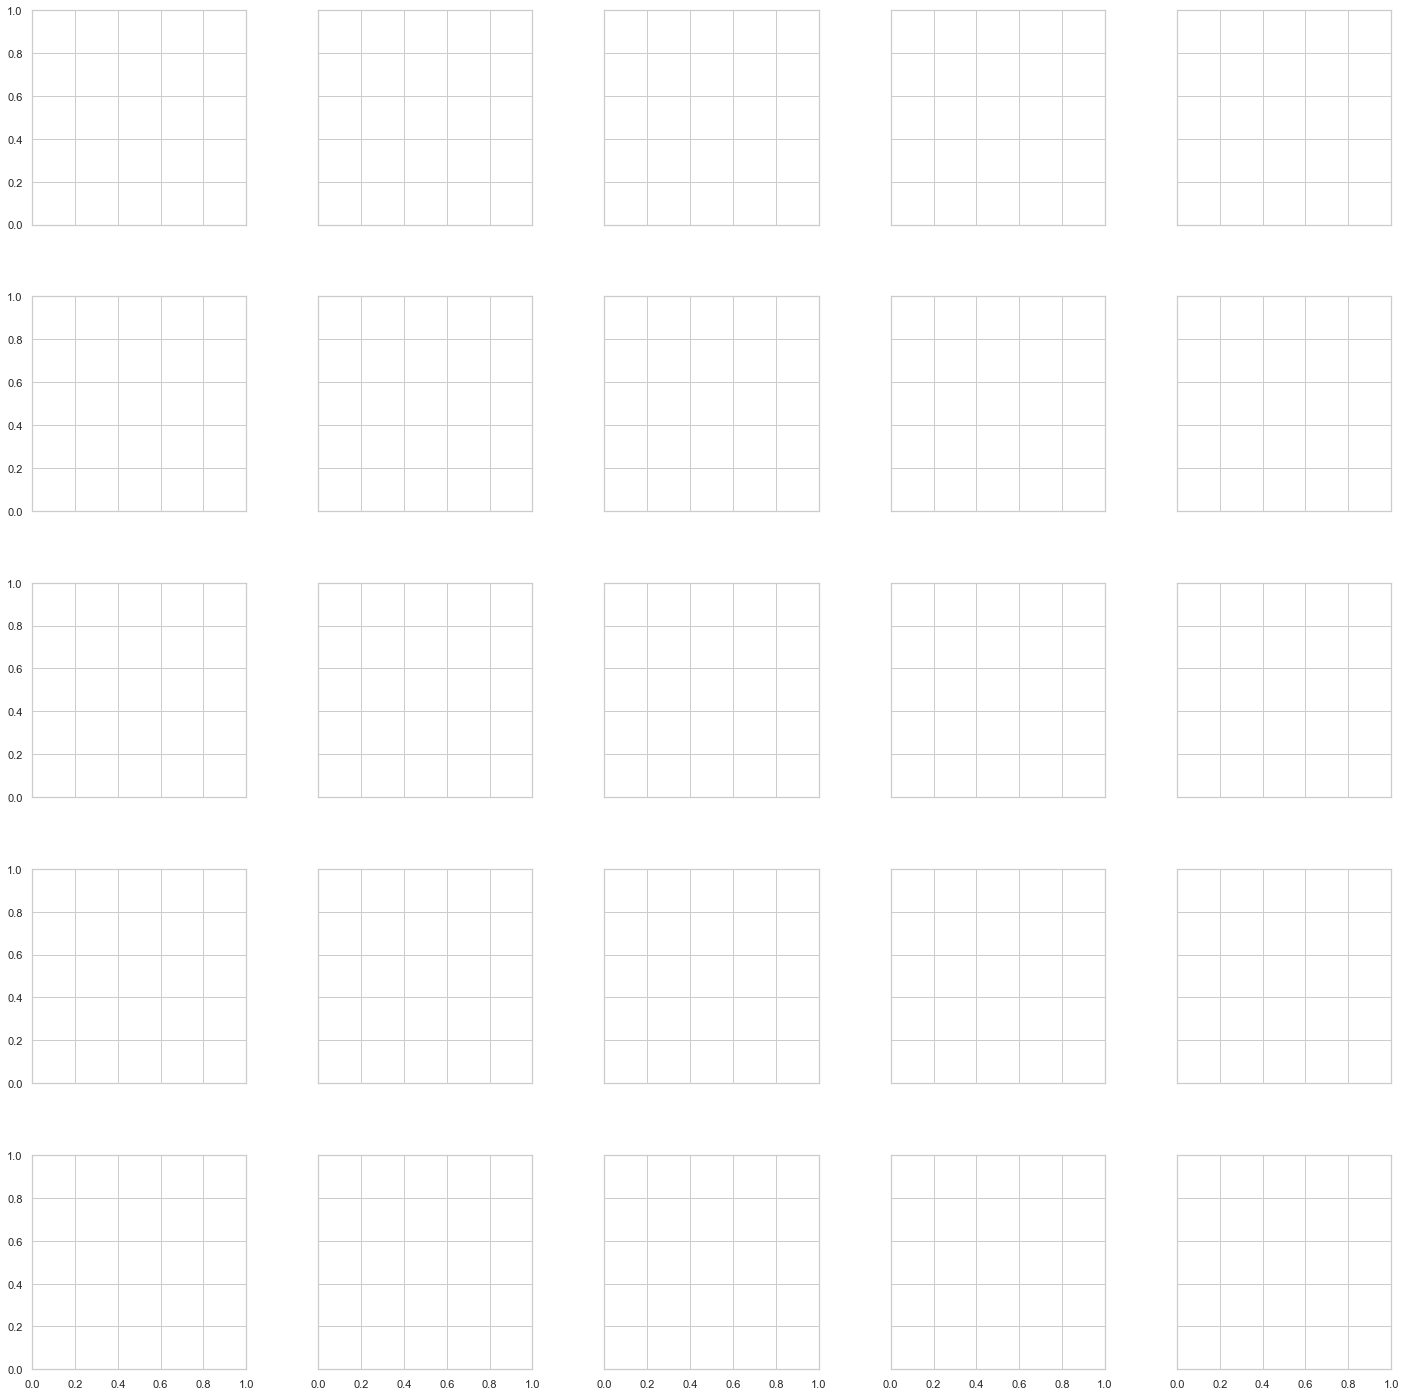

Rank 8


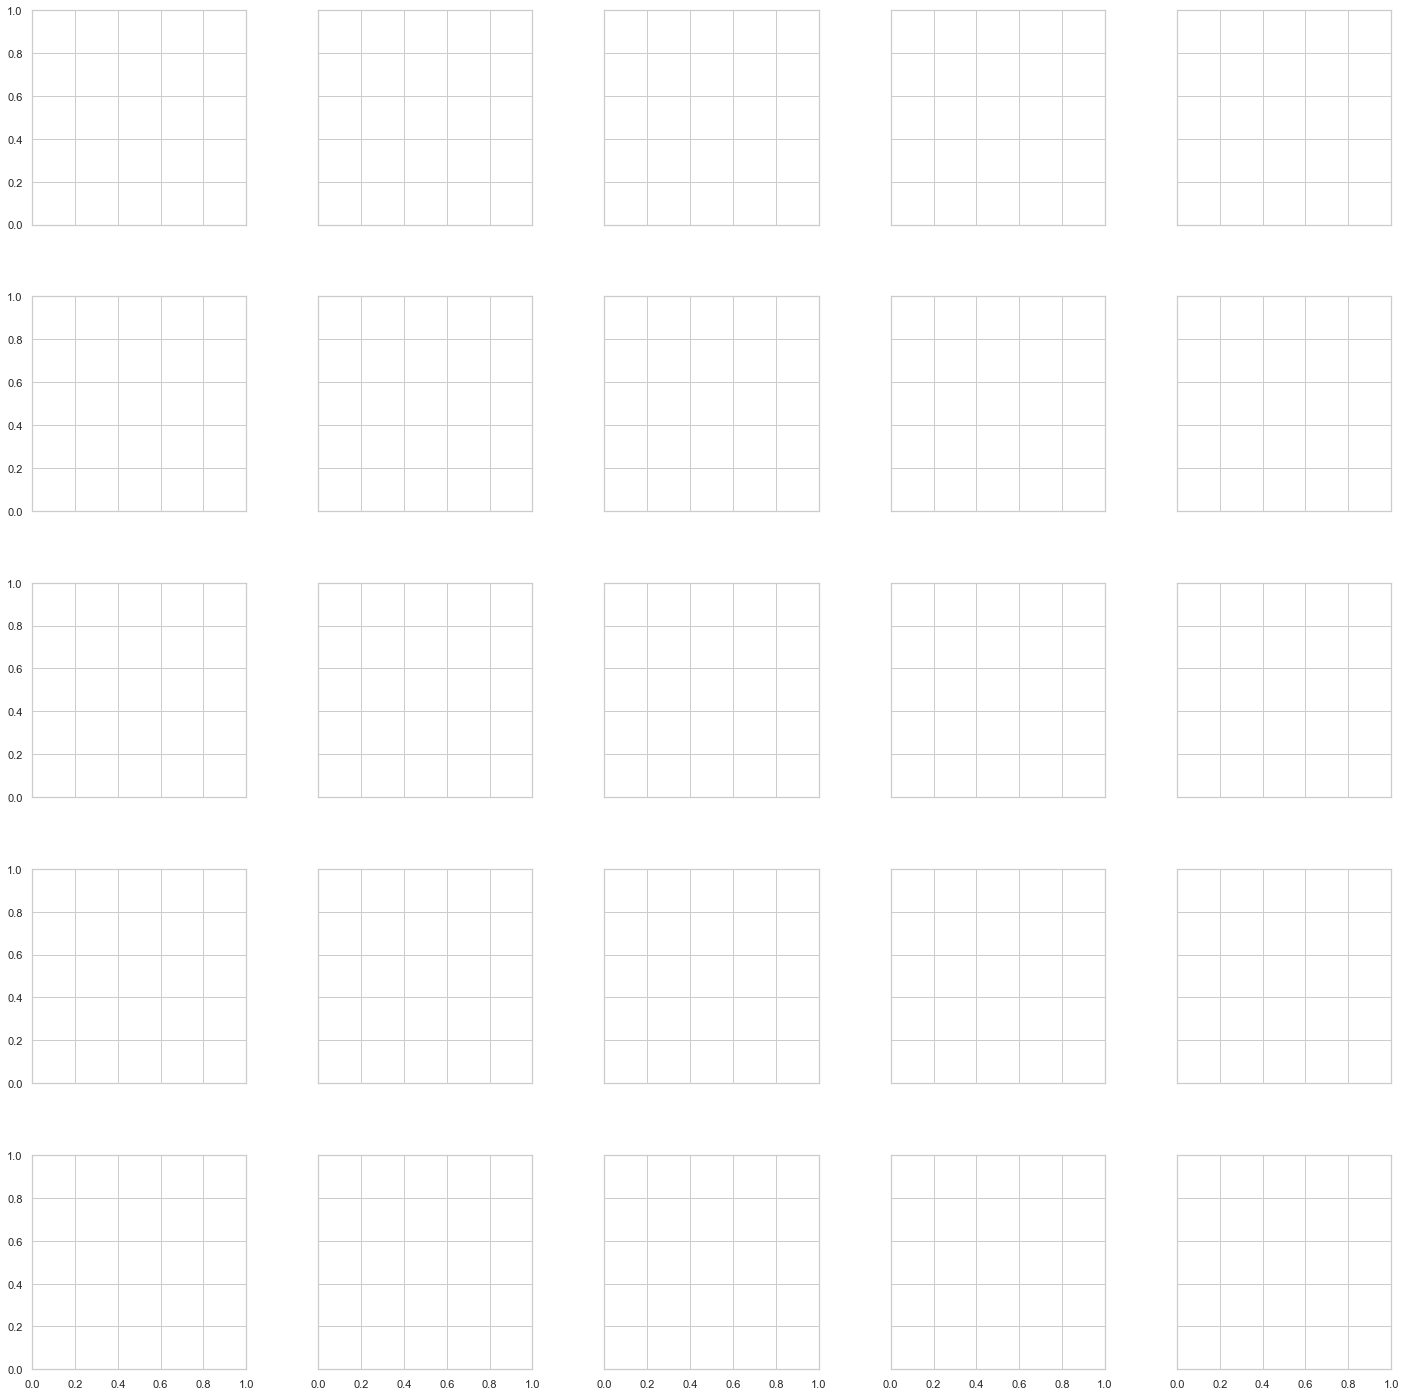

Rank 16


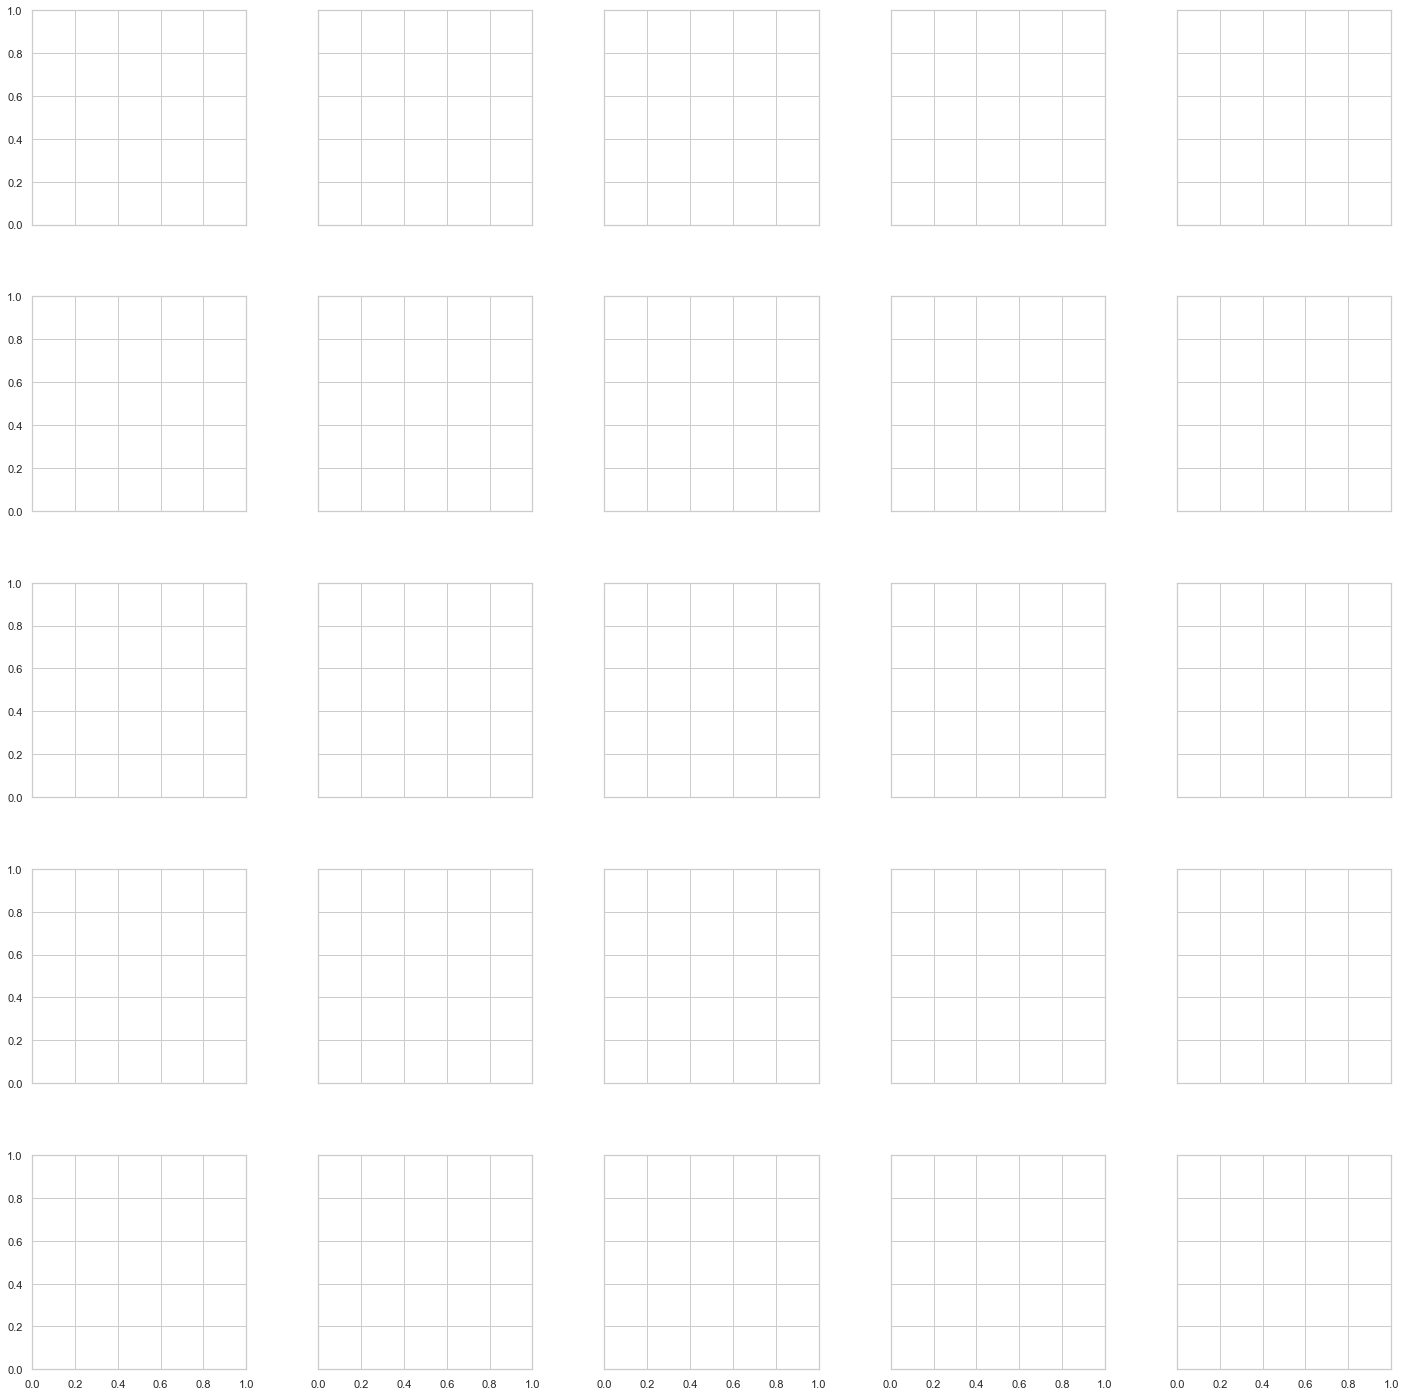

Rank 32


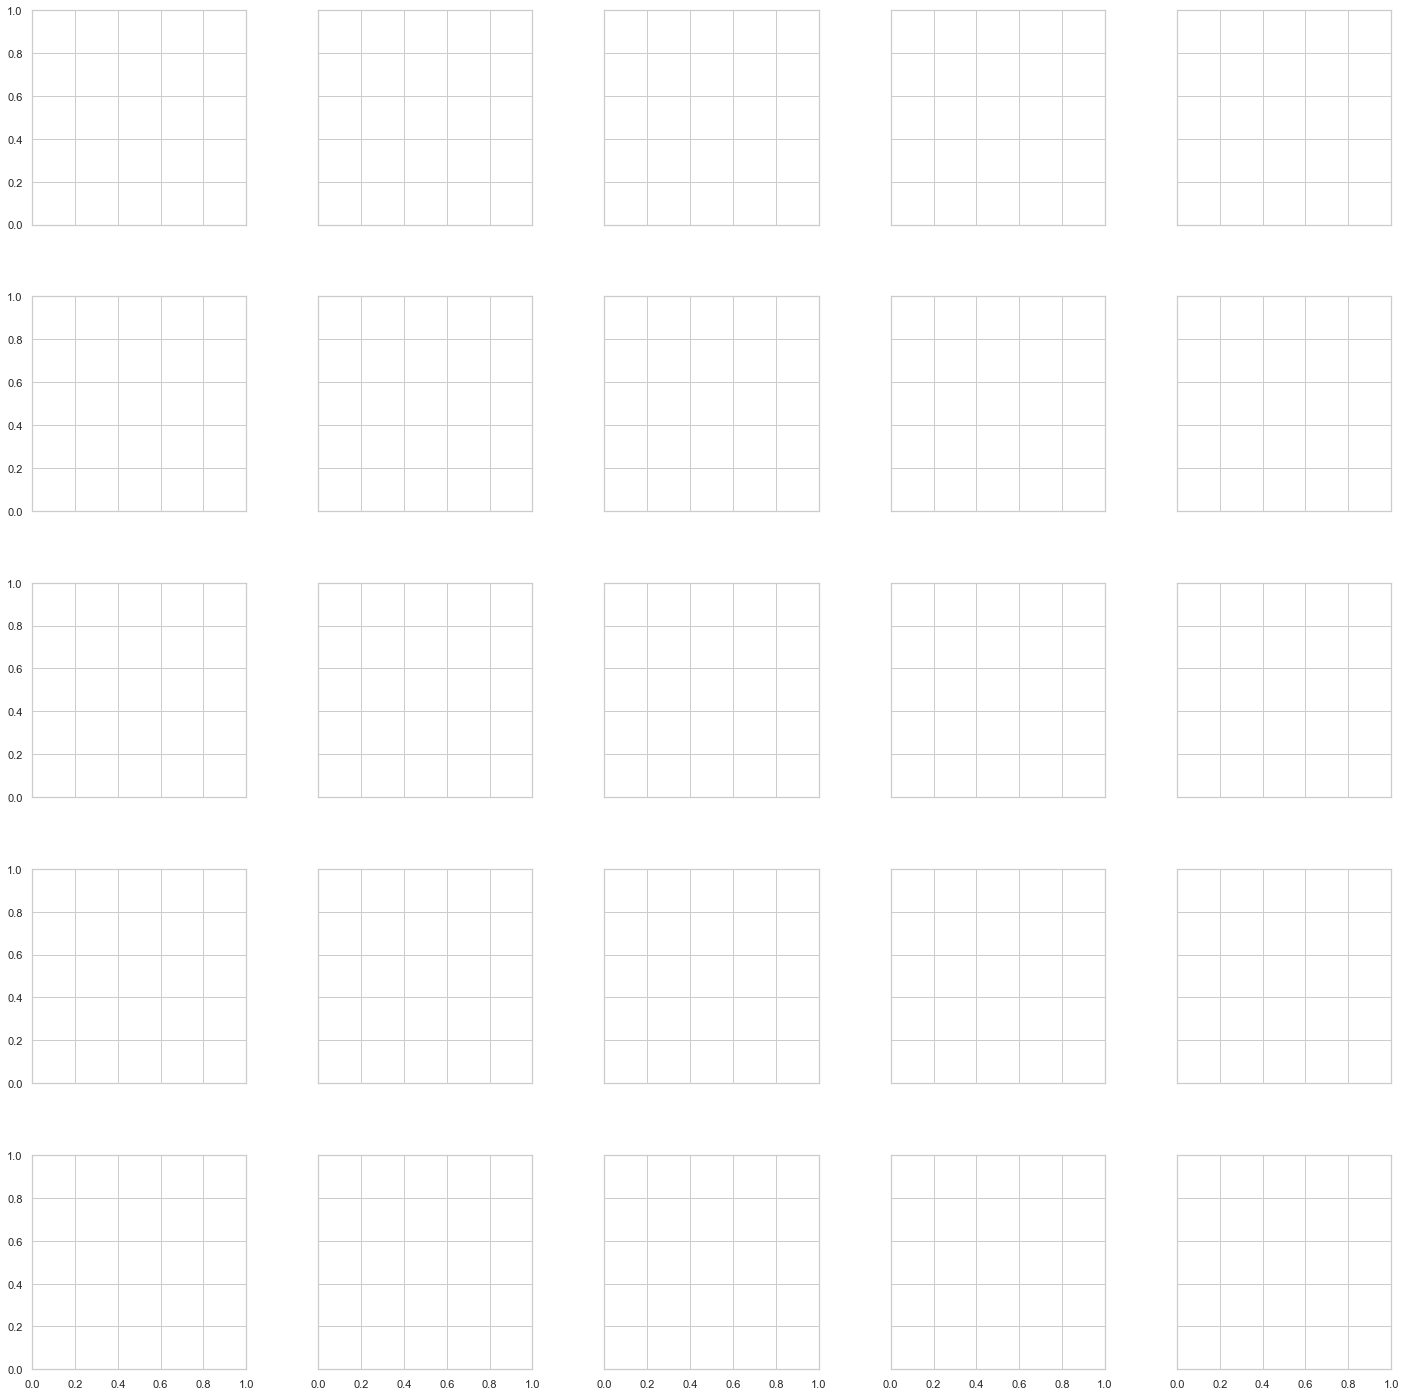

Rank 64


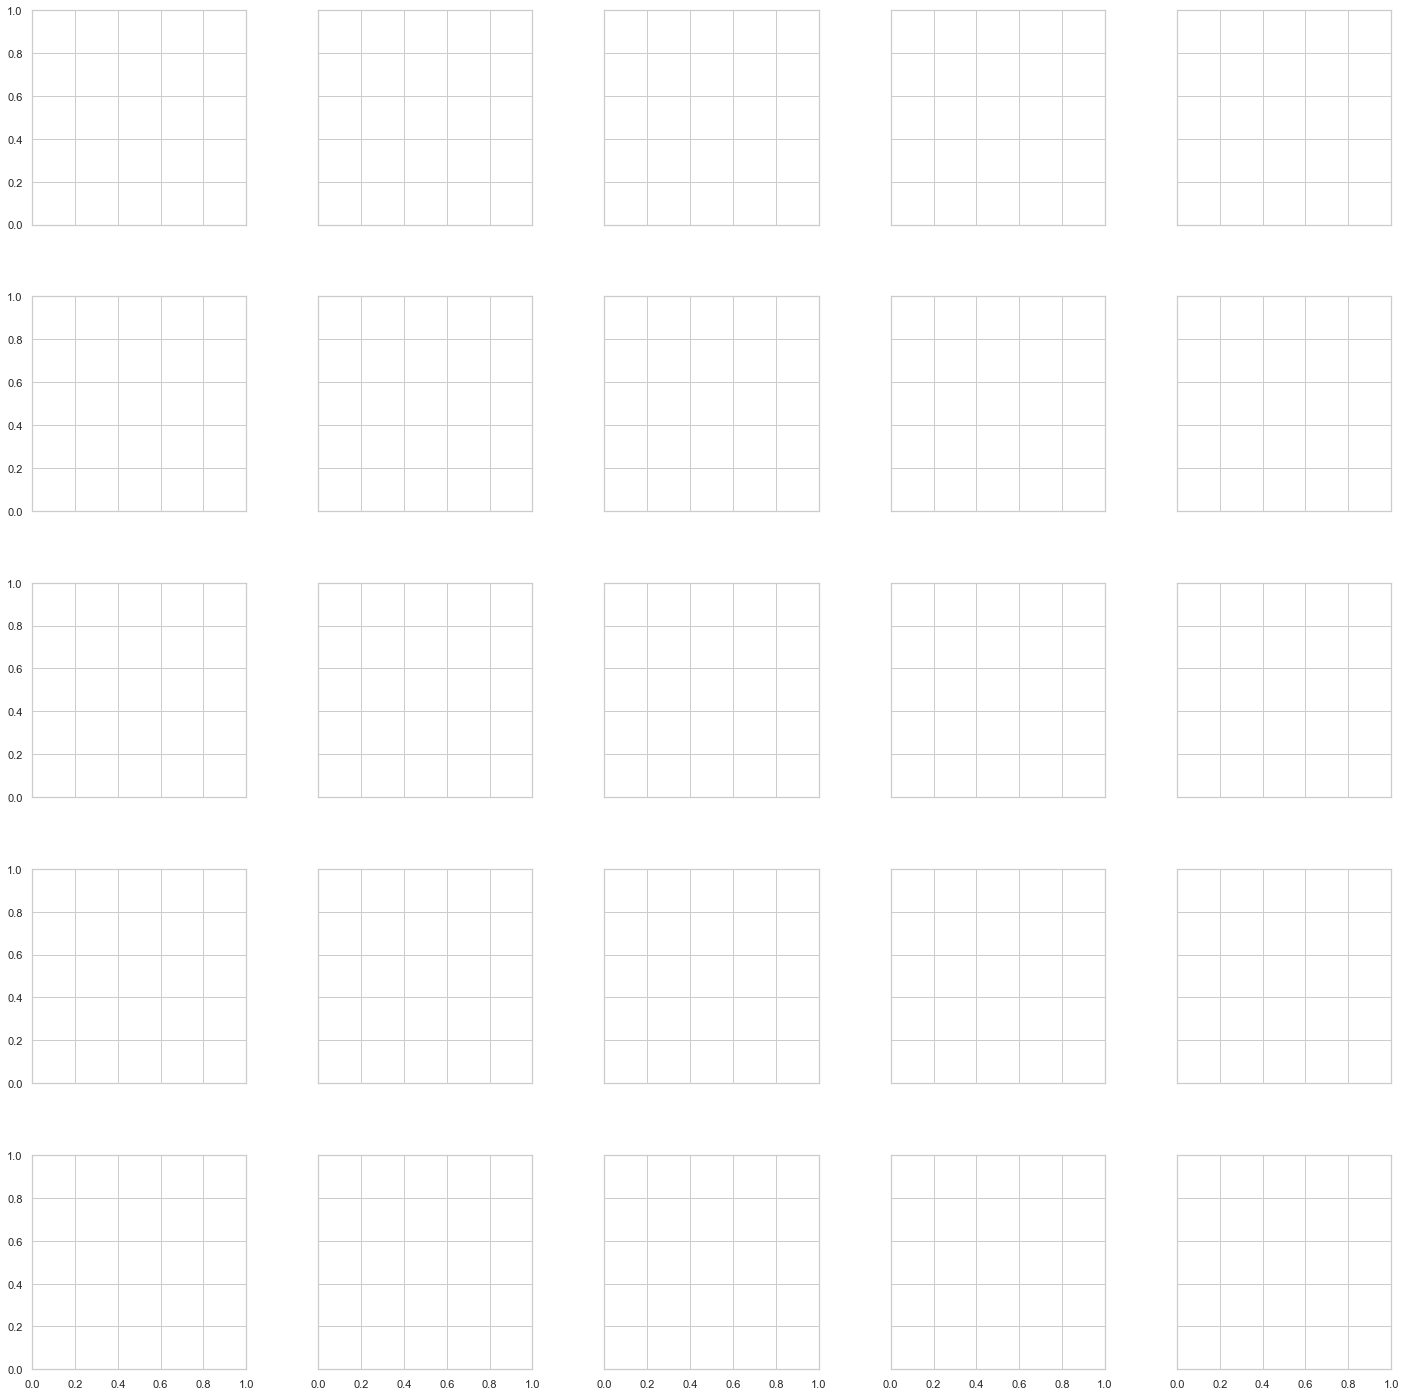

Rank 128


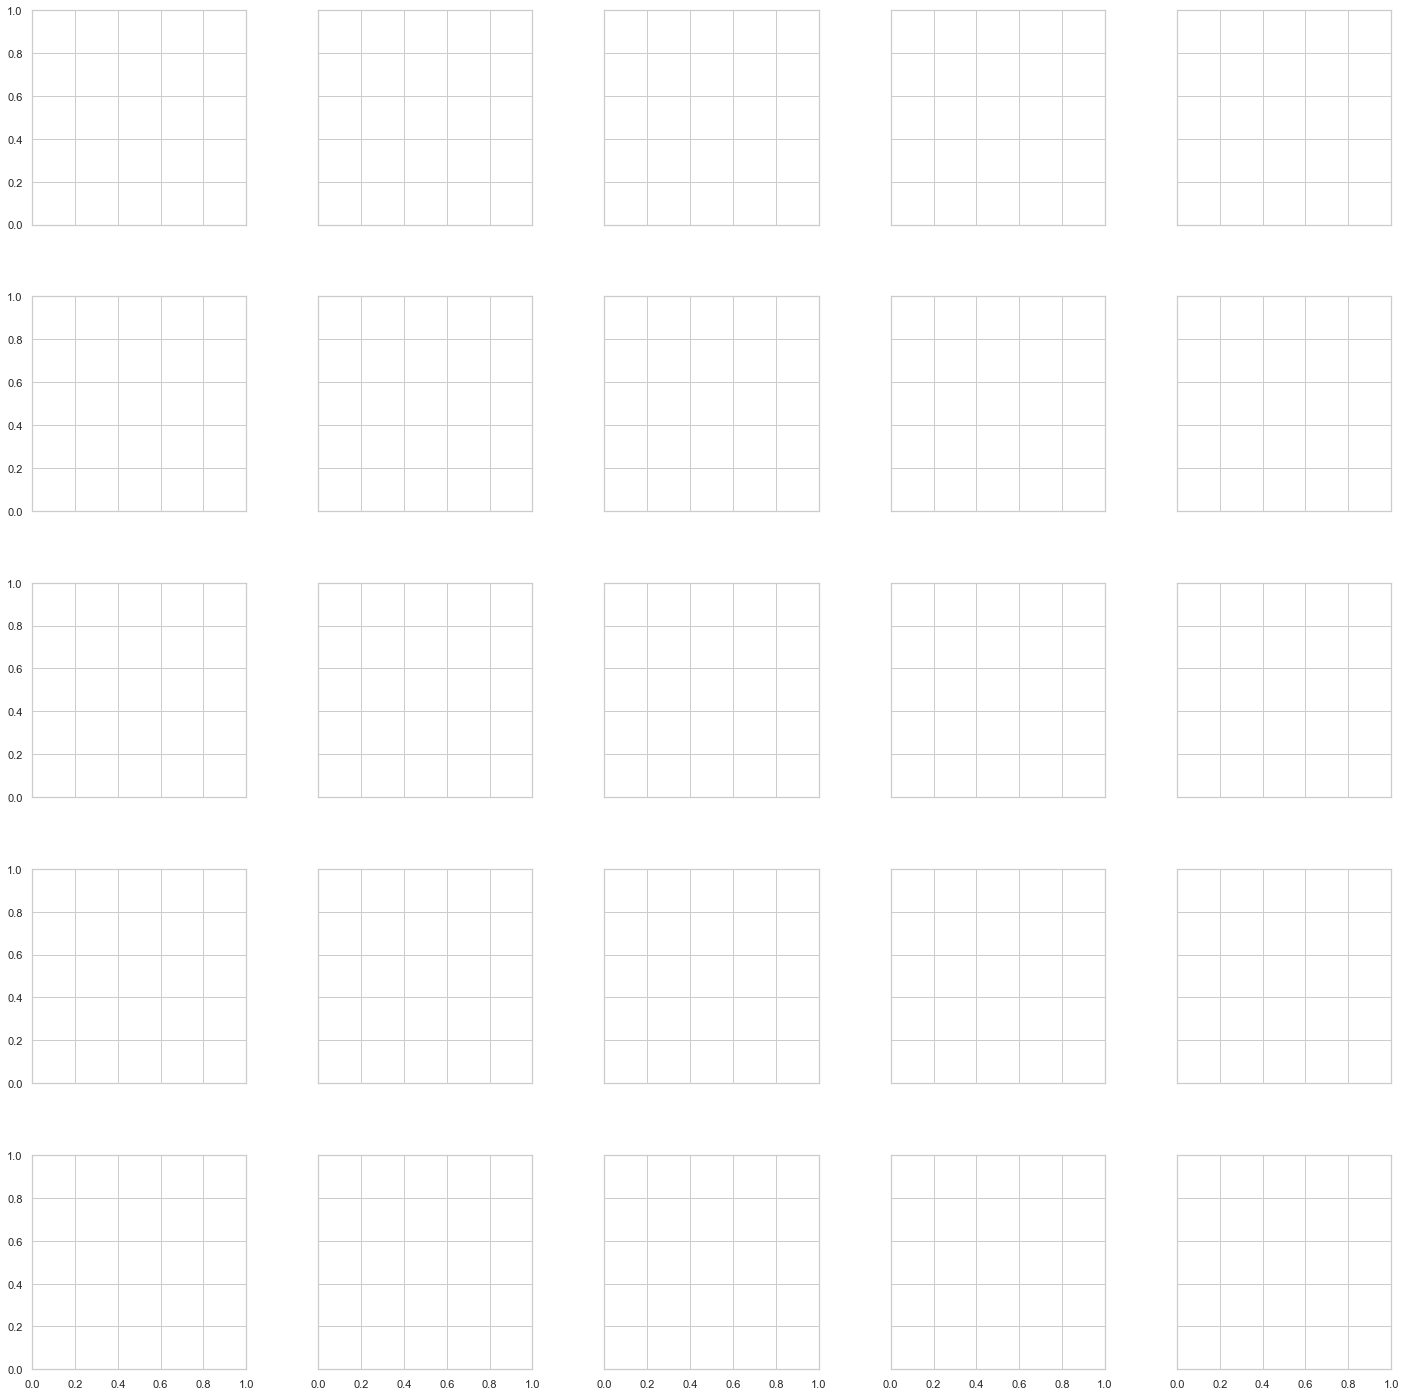

Rank 256


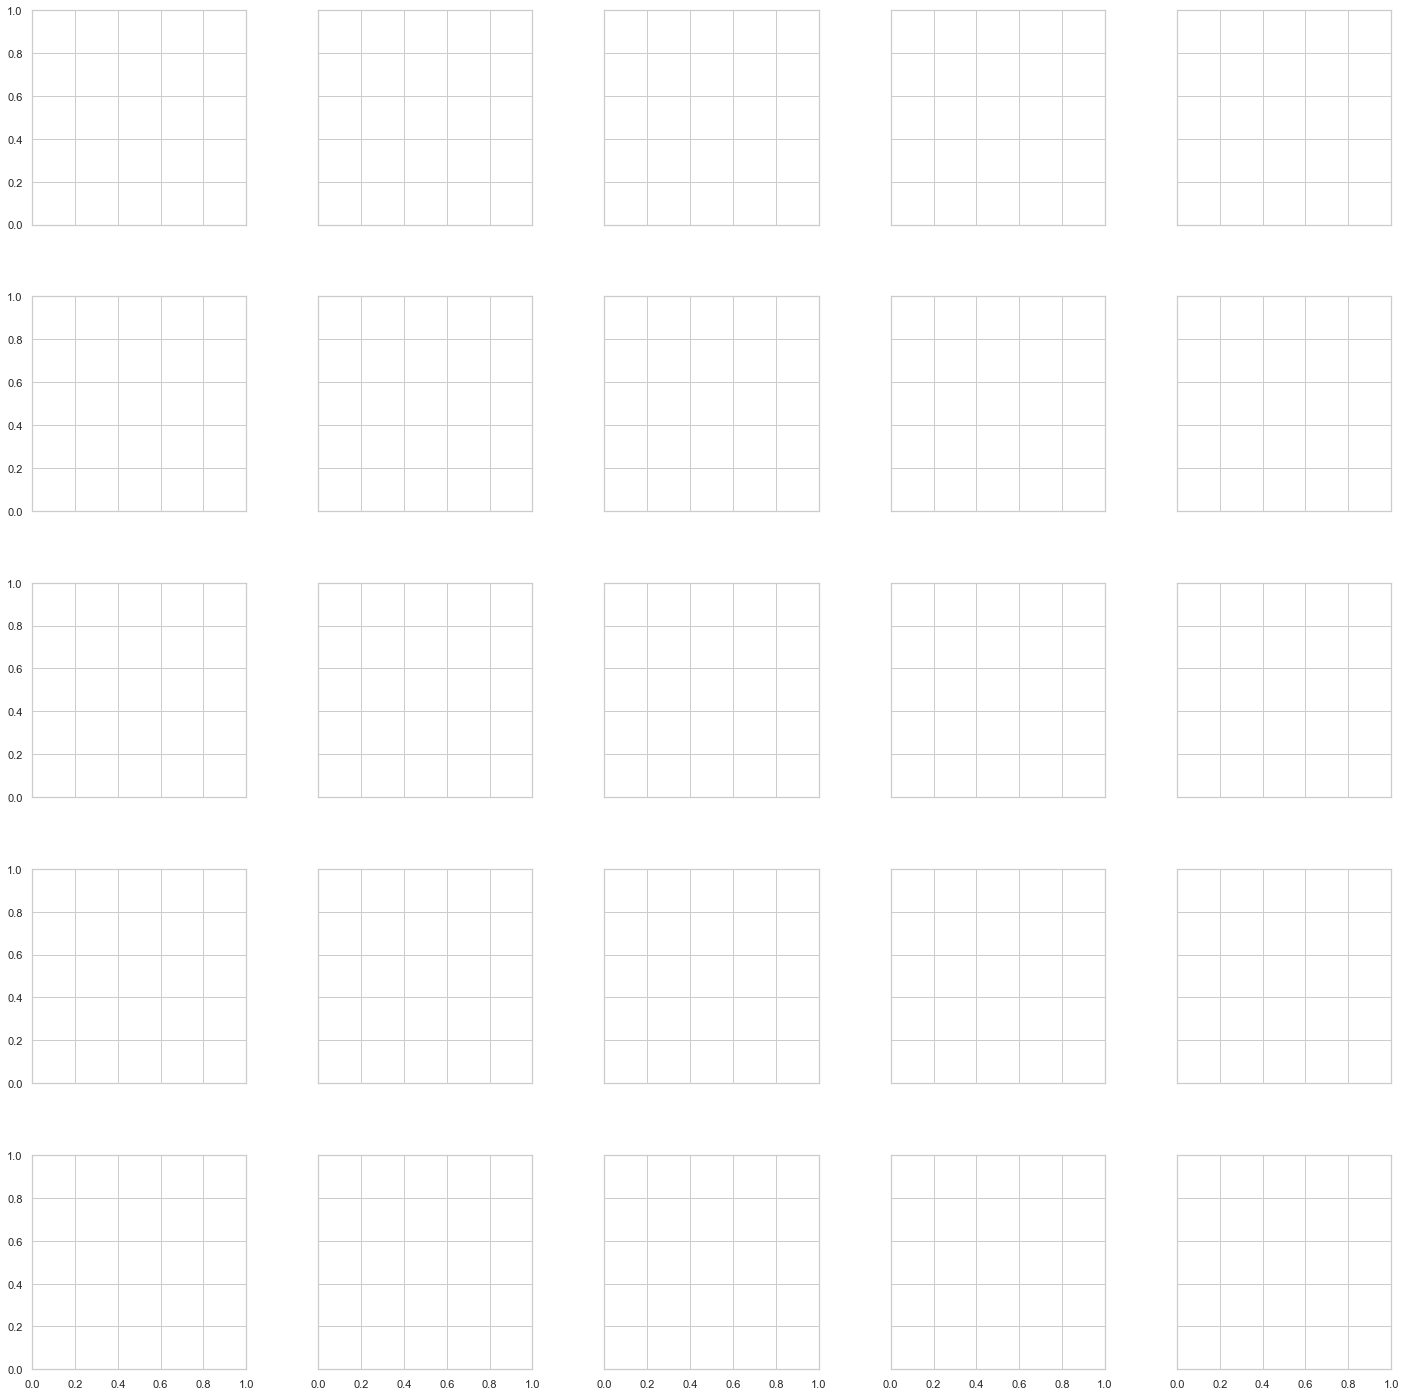

In [7]:
for i in range(2, 9):
    j = 2 ** i
    examples = get_examples(f'../inference/generated_images/dog/t2i/qkv_rank_{j}')
    print(f"Rank {j}")
    draw_examples(examples)

Concept: backpack

Rank 4


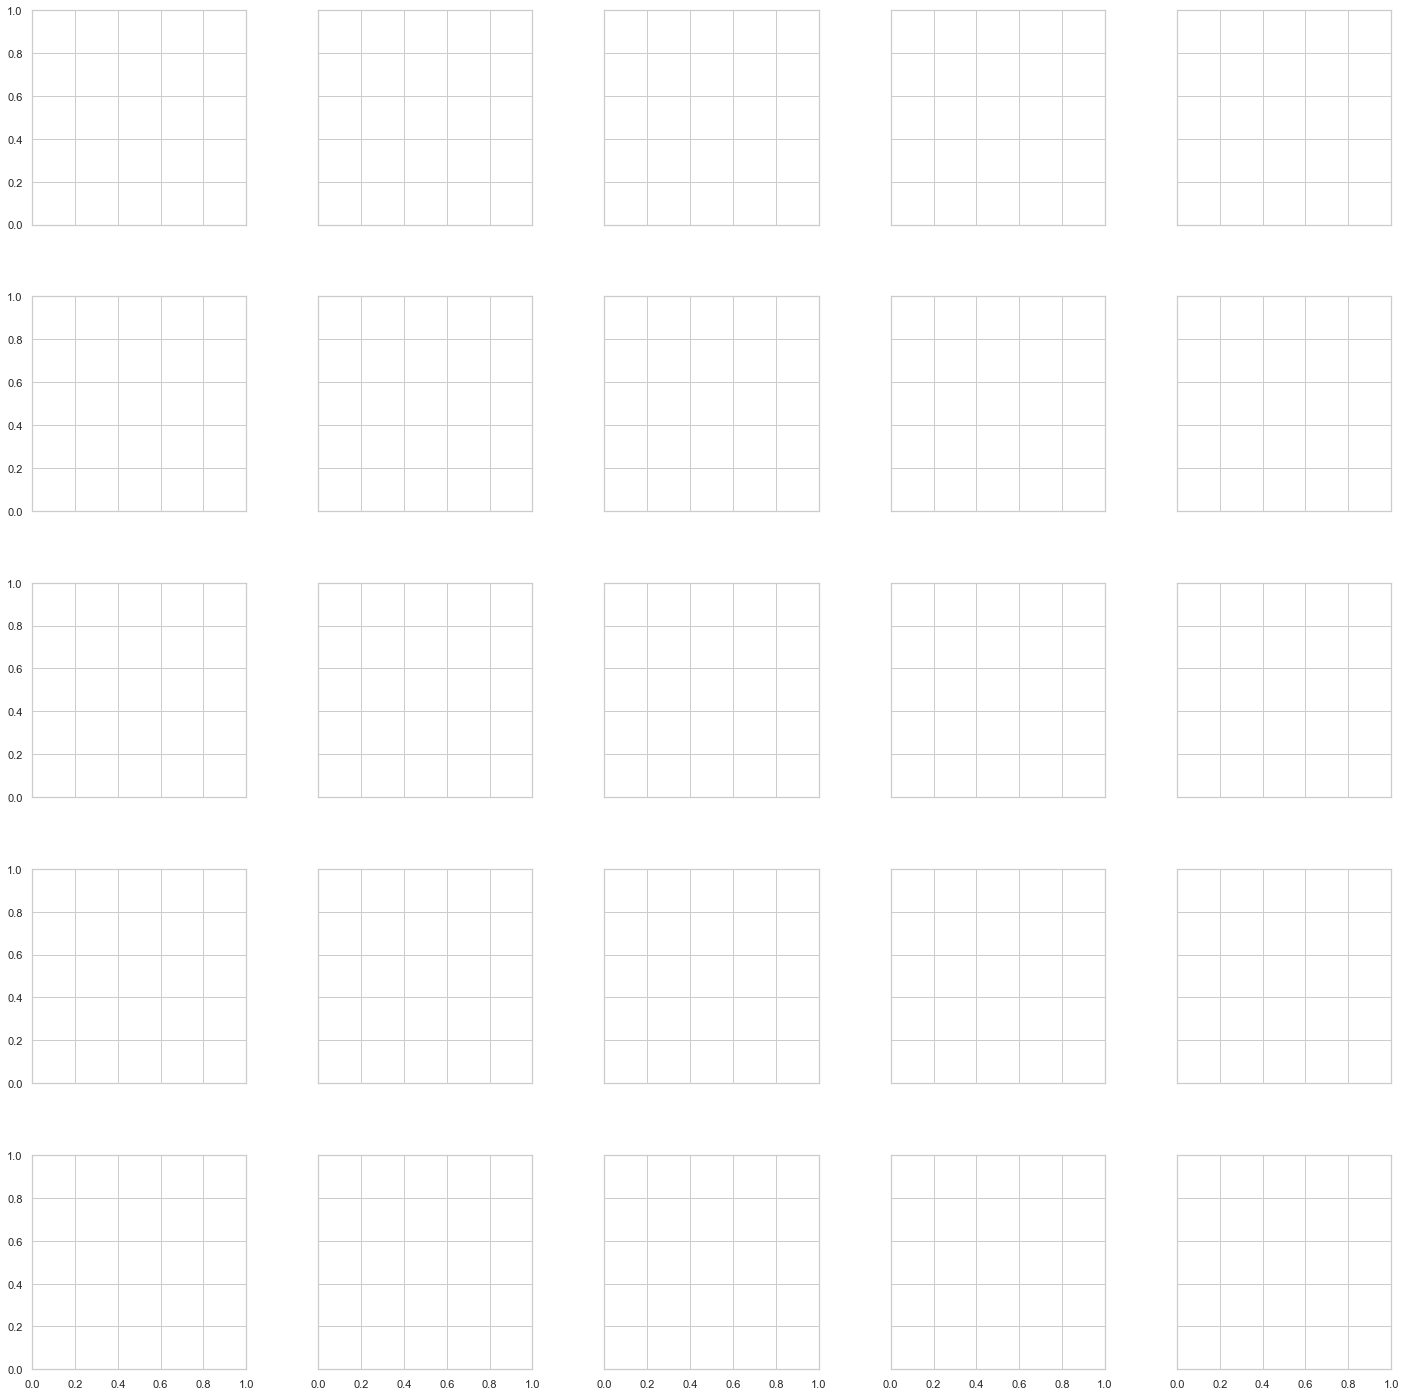

Rank 8


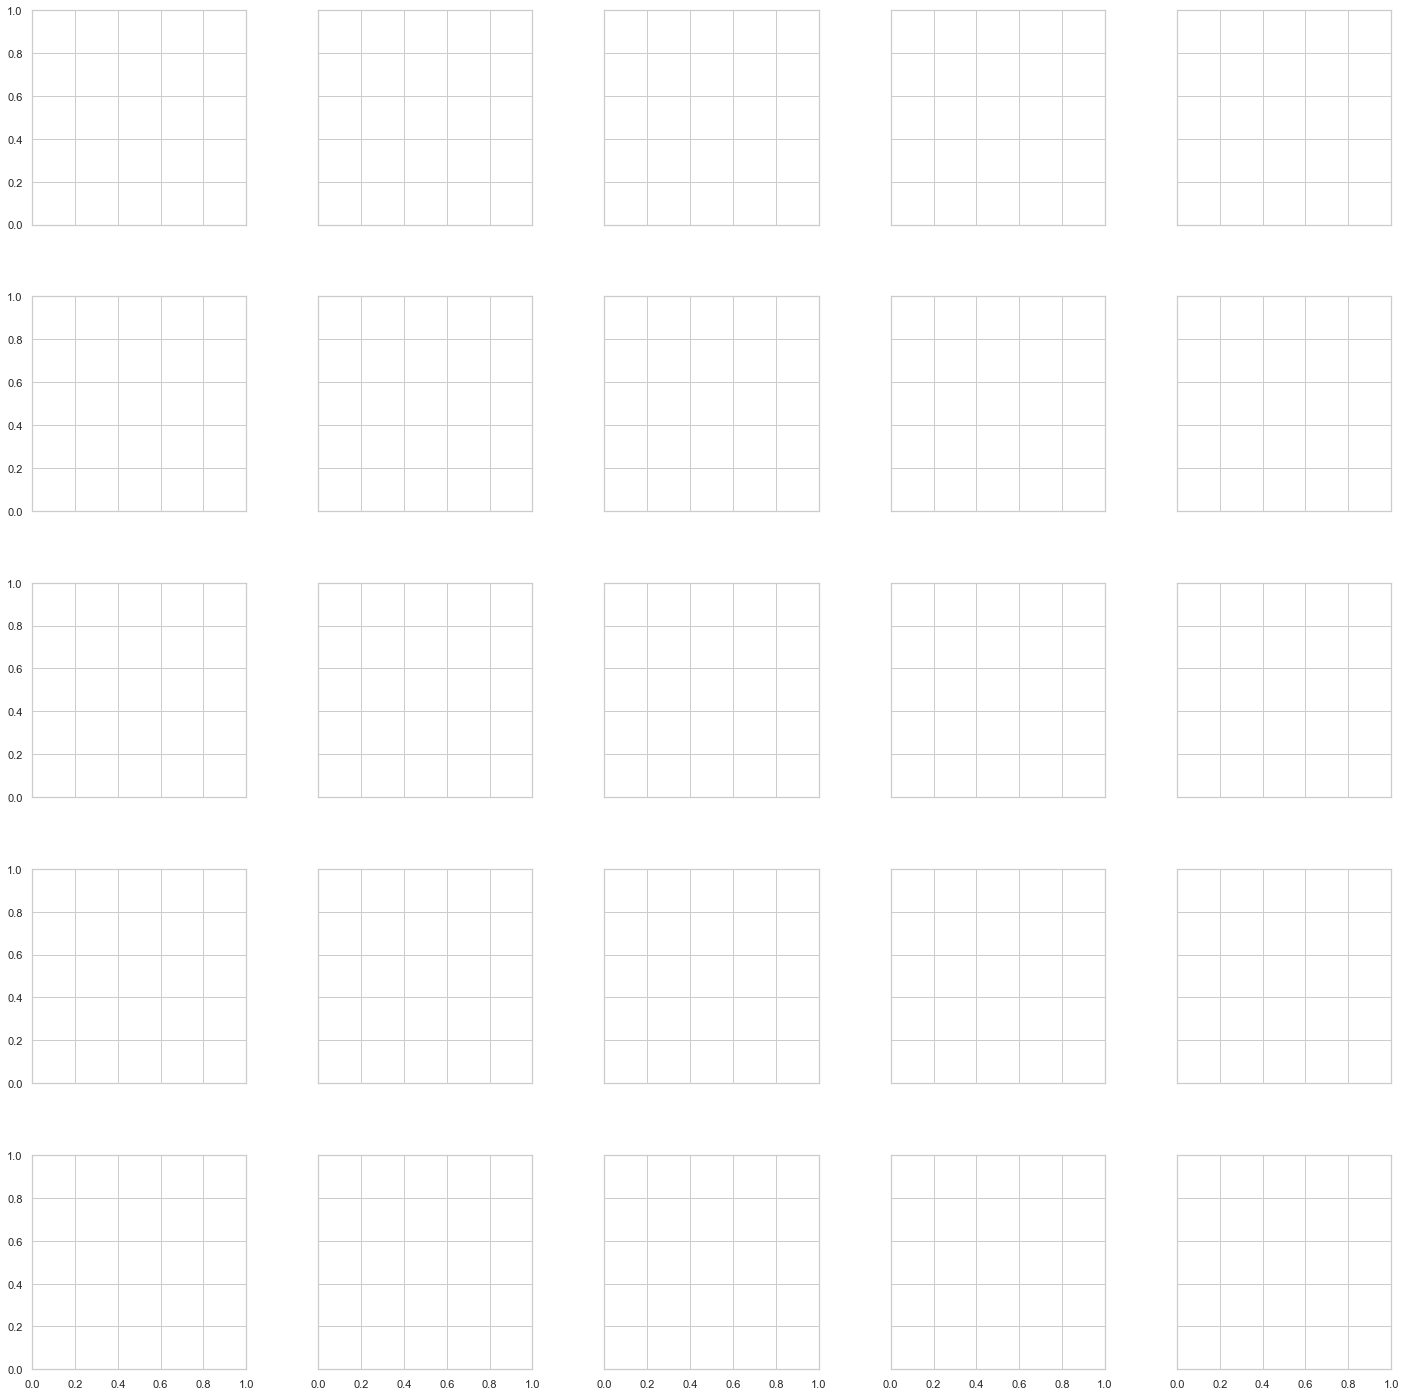

Rank 16


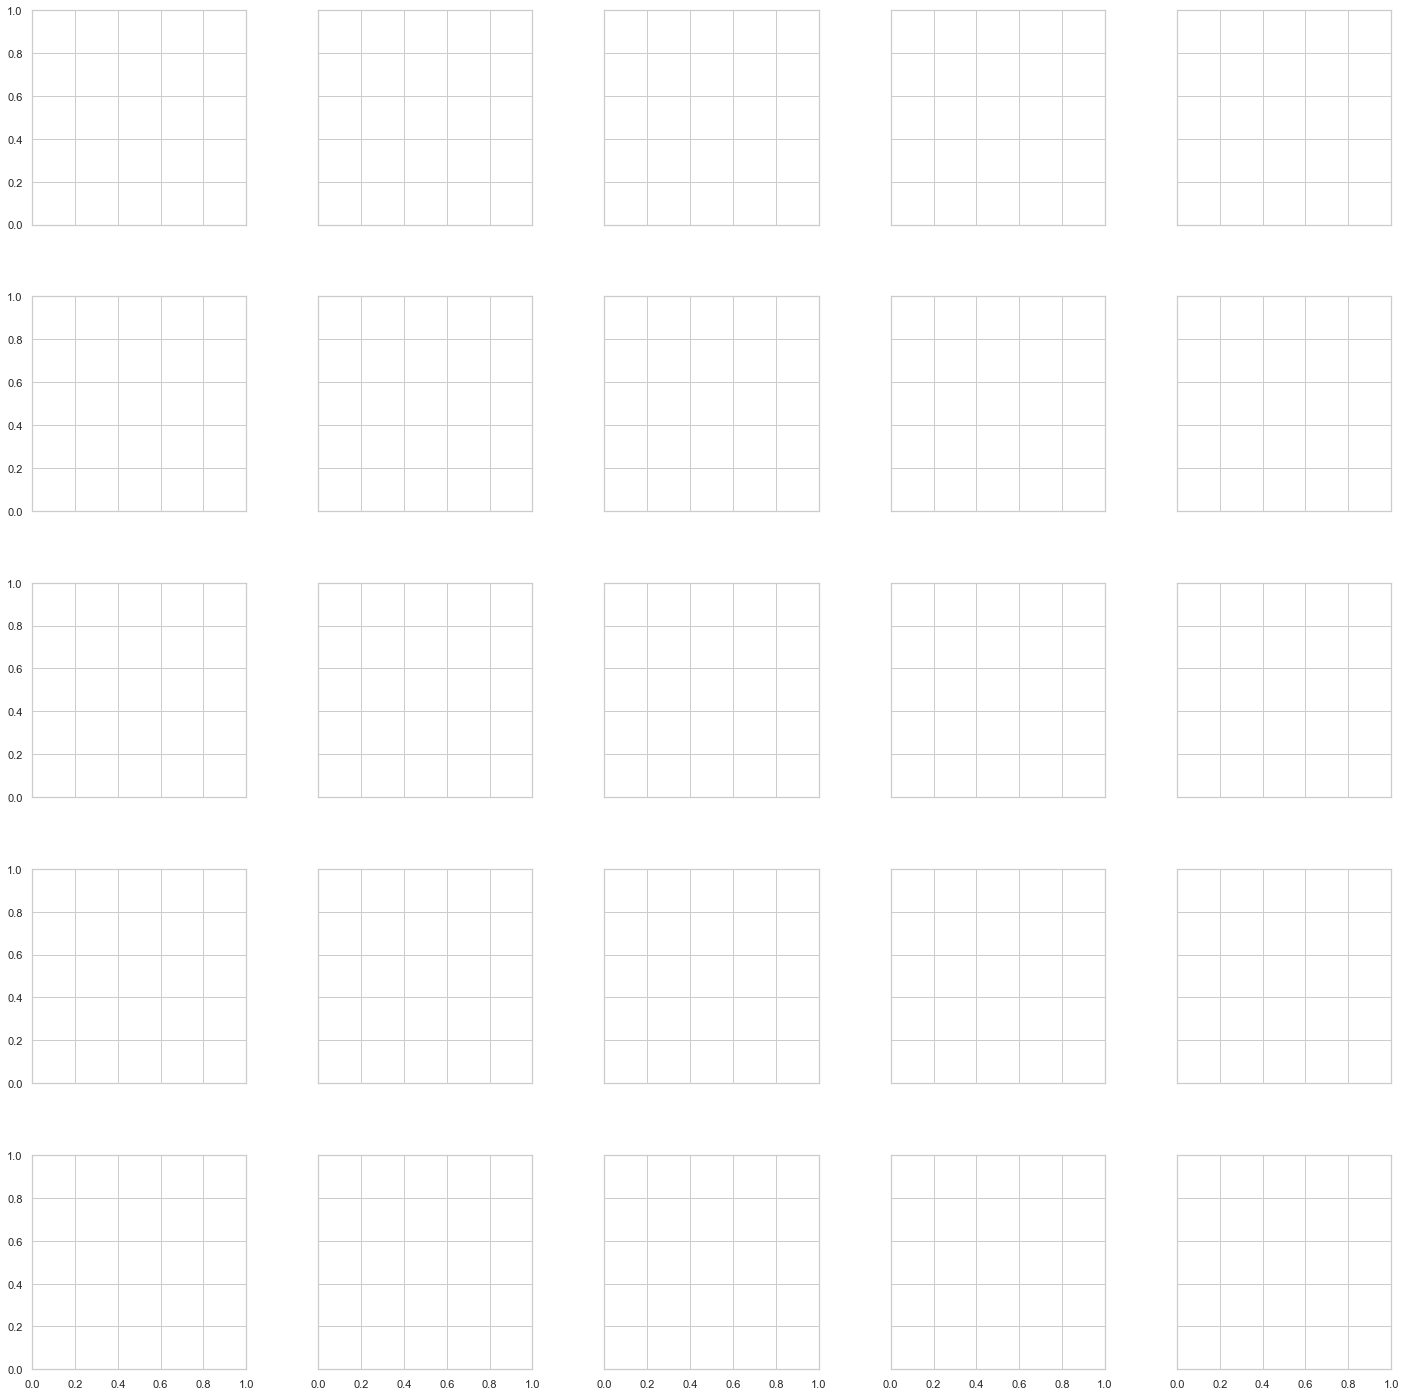

Rank 32


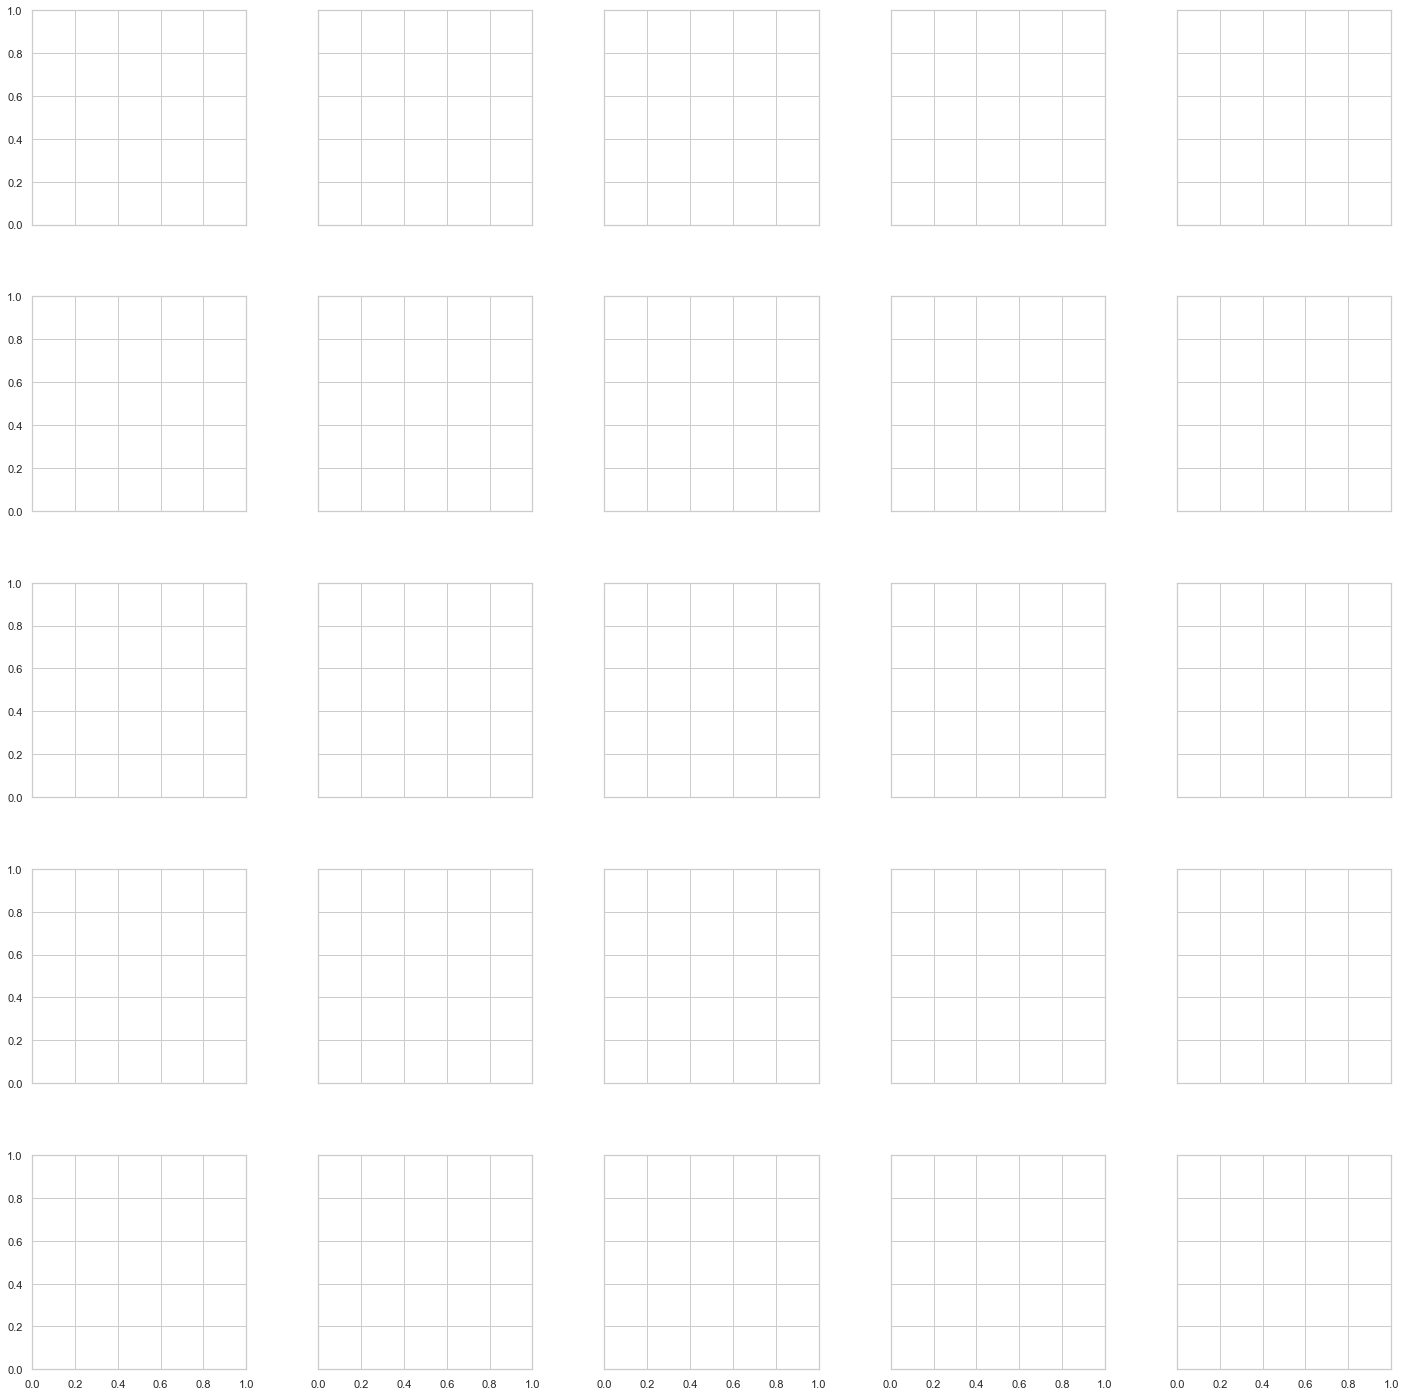

Rank 64


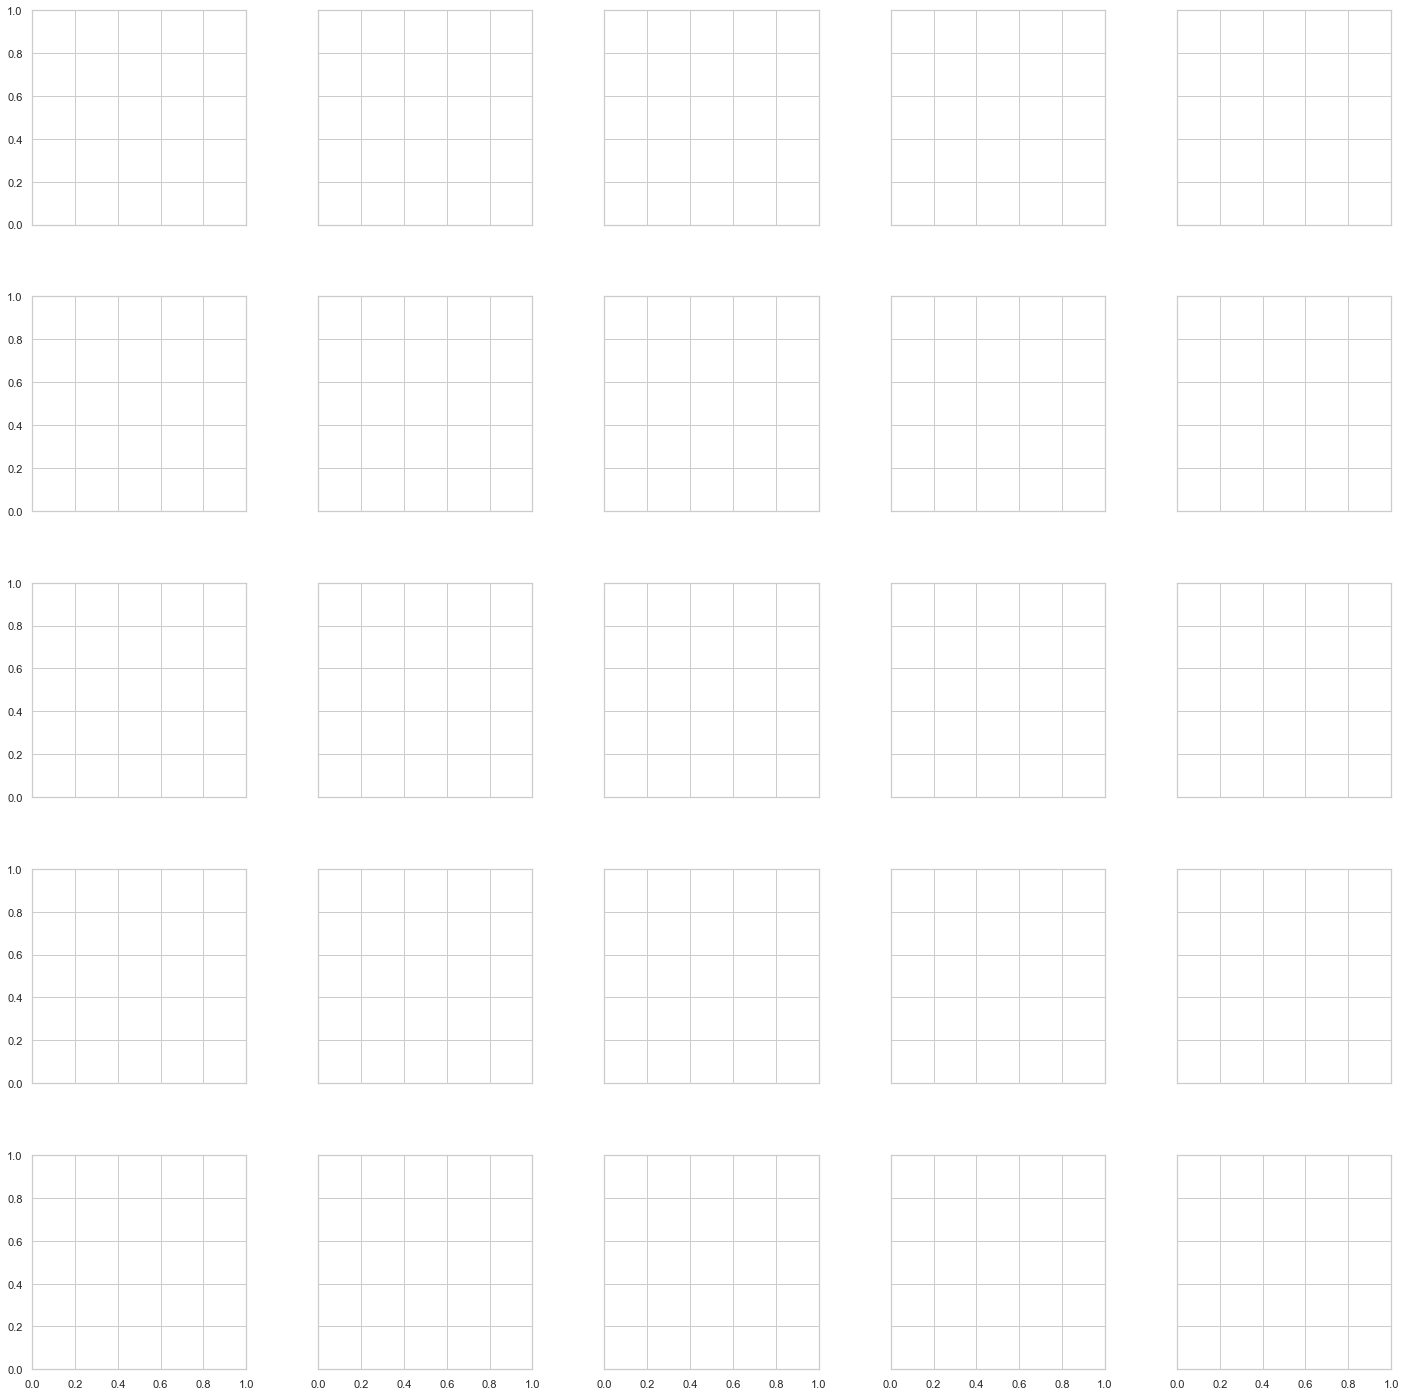

Rank 128


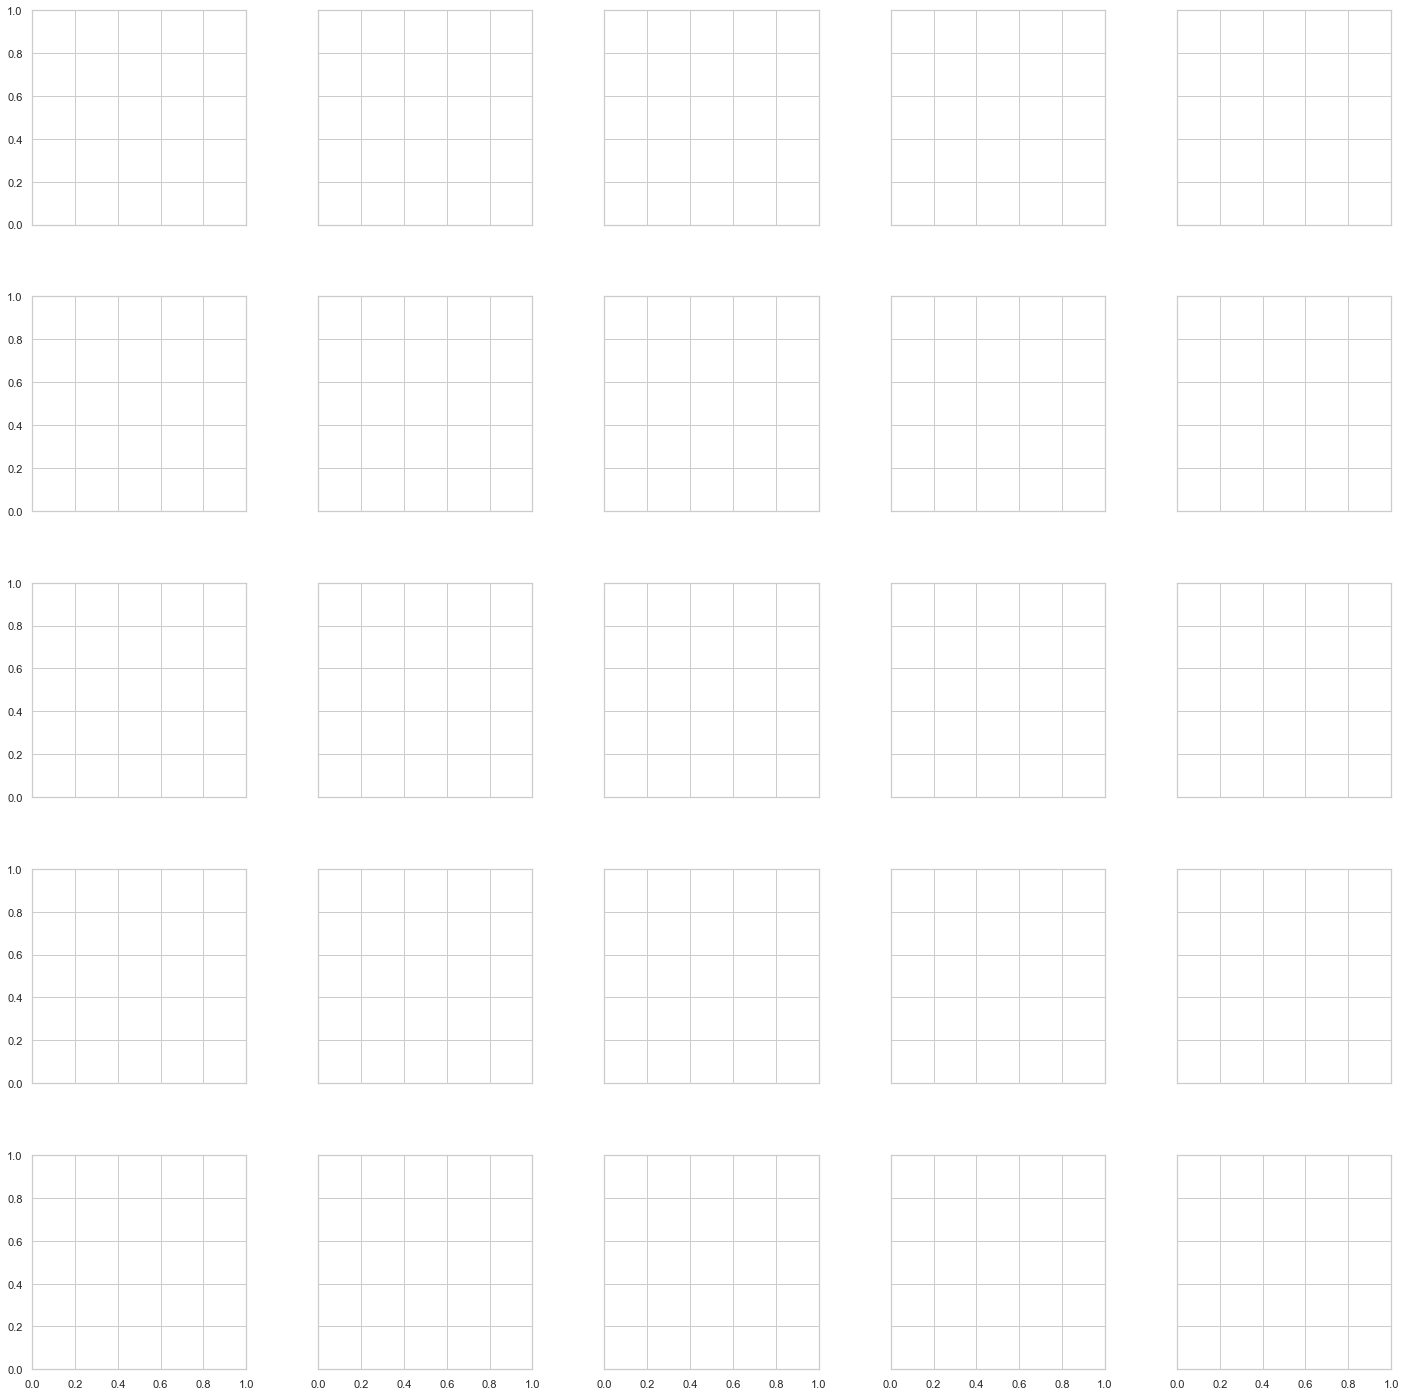

Rank 256


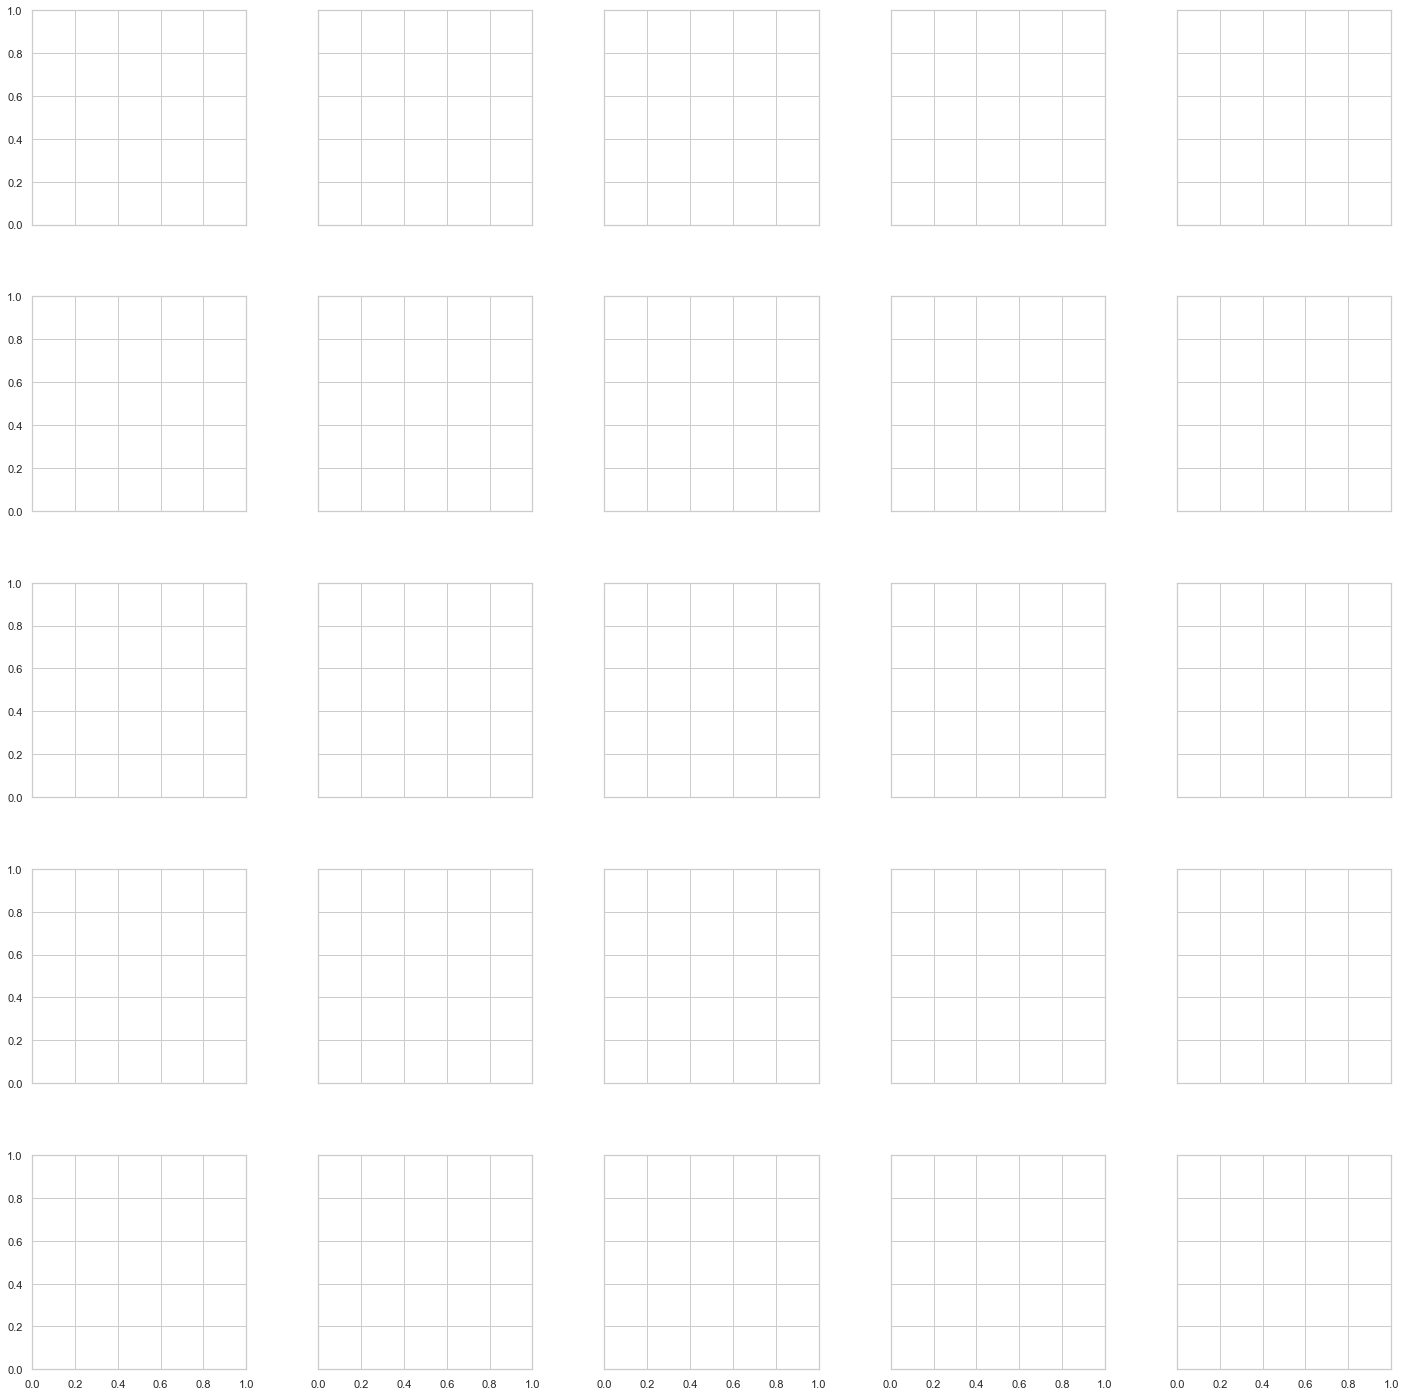

In [8]:
for i in range(2, 9):
    j = 2 ** i
    examples = get_examples(f'../inference/generated_images/backpack/t2i/qkv_rank_{j}')
    print(f"Rank {j}")
    draw_examples(examples)

Concept: cat

In [9]:
for i in range(2, 9):
    j = 2 ** i
    examples = get_examples(f'../inference/generated_images/cat/t2i/qkv_rank_{j}')
    print(f"Rank {j}")
    draw_examples(examples)

Rank 4


KeyboardInterrupt: 